In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from utils import data, metrics, models

# Preprocessing data

In [2]:
FREQ = '1min'
TEST_LAG = 15
TRAIN_LAG = 15
N_DAYS_TEST = 10
PAST_HISTORY = 384
FORCASTING_HORIZON = 96
SCALER = MinMaxScaler().fit([[130.0], [260.0]])

In [3]:
df = data.read_dataframe('../data/2020-01-KE.csv')
end_date = df.index.max()
df

,Value
Datetime,
2020-01-01 00:00:00+00:00,191.0
2020-01-01 00:02:00+00:00,190.0
2020-01-01 00:03:00+00:00,188.0
2020-01-01 00:04:00+00:00,188.0
2020-01-01 00:06:00+00:00,188.0
...,...
2020-01-31 23:55:00+00:00,212.0
2020-01-31 23:56:00+00:00,212.0
2020-01-31 23:57:00+00:00,212.0


,Value
Datetime,
2020-01-01 00:00:00+00:00,191.0
2020-01-01 00:01:00+00:00,190.0
2020-01-01 00:02:00+00:00,190.0
2020-01-01 00:03:00+00:00,188.0
2020-01-01 00:04:00+00:00,188.0
...,...
2020-01-31 23:55:00+00:00,212.0
2020-01-31 23:56:00+00:00,212.0
2020-01-31 23:57:00+00:00,212.0


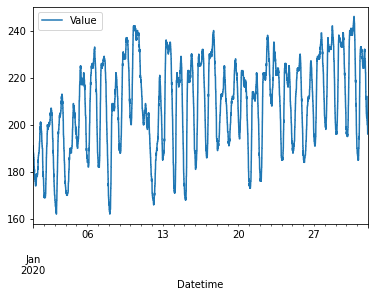

In [4]:
df = data.transform_to_evenly_spaced(df, freq=FREQ)
df.plot()
df

,Value
Datetime,
2020-01-01 00:00:00+00:00,0.469231
2020-01-01 00:01:00+00:00,0.461538
2020-01-01 00:02:00+00:00,0.461538
2020-01-01 00:03:00+00:00,0.446154
2020-01-01 00:04:00+00:00,0.446154
...,...
2020-01-31 23:55:00+00:00,0.630769
2020-01-31 23:56:00+00:00,0.630769
2020-01-31 23:57:00+00:00,0.630769


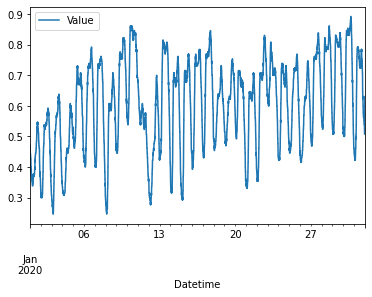

In [5]:
df, scaler = data.scale_features(df, scaler=SCALER, n_days_test=N_DAYS_TEST, fit_scaler=False)
df.plot()
df

In [6]:
df = data.build_features(df, past_history=PAST_HISTORY, forecasting_horizon=FORCASTING_HORIZON, train_lag=TRAIN_LAG, test_lag=TEST_LAG)
df

/home/pedrolarben/Dropbox/Pedro/Projects/kinetic-energy-forecasting/experiments/utils/data.py:37: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"X_{i}"] = df[value_column].shift(i*train_lag)


,X_384,X_383,X_382,X_381,X_380,X_379,X_378,X_377,X_376,X_375,...,y_86,y_87,y_88,y_89,y_90,y_91,y_92,y_93,y_94,y_95
Datetime,,,,,,,,,,,,,,,,,,,,,
2020-01-05 00:00:00+00:00,0.469231,0.446154,0.446154,0.438462,0.438462,0.430769,0.423077,0.423077,0.407692,0.400000,...,0.507692,0.500000,0.469231,0.453846,0.461538,0.453846,0.438462,0.430769,0.438462,0.430769
2020-01-05 00:01:00+00:00,0.461538,0.446154,0.446154,0.438462,0.430769,0.430769,0.423077,0.415385,0.407692,0.400000,...,0.507692,0.500000,0.469231,0.453846,0.453846,0.453846,0.430769,0.430769,0.438462,0.430769
2020-01-05 00:02:00+00:00,0.461538,0.446154,0.446154,0.438462,0.430769,0.430769,0.423077,0.415385,0.400000,0.400000,...,0.507692,0.492308,0.461538,0.453846,0.453846,0.453846,0.430769,0.430769,0.430769,0.430769
2020-01-05 00:03:00+00:00,0.446154,0.446154,0.446154,0.438462,0.430769,0.430769,0.423077,0.407692,0.400000,0.400000,...,0.507692,0.492308,0.461538,0.461538,0.453846,0.453846,0.430769,0.430769,0.430769,0.430769
2020-01-05 00:04:00+00:00,0.446154,0.446154,0.446154,0.438462,0.430769,0.430769,0.423077,0.407692,0.400000,0.400000,...,0.507692,0.492308,0.461538,0.461538,0.453846,0.446154,0.430769,0.430769,0.430769,0.430769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-31 00:10:00+00:00,0.492308,0.484615,0.484615,0.484615,0.476923,0.469231,0.469231,0.469231,0.476923,0.476923,...,0.553846,0.553846,0.546154,0.538462,0.538462,0.538462,0.515385,0.507692,0.569231,0.630769
2020-01-31 00:11:00+00:00,0.492308,0.484615,0.484615,0.476923,0.476923,0.469231,0.469231,0.469231,0.476923,0.476923,...,0.553846,0.553846,0.546154,0.538462,0.538462,0.538462,0.515385,0.507692,0.630769,0.630769
2020-01-31 00:12:00+00:00,0.492308,0.484615,0.484615,0.476923,0.476923,0.469231,0.469231,0.469231,0.476923,0.476923,...,0.553846,0.553846,0.538462,0.538462,0.538462,0.538462,0.515385,0.507692,0.630769,0.630769


In [7]:
df_train, df_test = data.split_train_test(df, end_date=end_date, n_days_test=N_DAYS_TEST)
print('Train')
display(df_train)
print('Test')
display(df_test)

Train


,X_384,X_383,X_382,X_381,X_380,X_379,X_378,X_377,X_376,X_375,...,y_86,y_87,y_88,y_89,y_90,y_91,y_92,y_93,y_94,y_95
Datetime,,,,,,,,,,,,,,,,,,,,,
2020-01-05 00:00:00+00:00,0.469231,0.446154,0.446154,0.438462,0.438462,0.430769,0.423077,0.423077,0.407692,0.400000,...,0.507692,0.500000,0.469231,0.453846,0.461538,0.453846,0.438462,0.430769,0.438462,0.430769
2020-01-05 00:01:00+00:00,0.461538,0.446154,0.446154,0.438462,0.430769,0.430769,0.423077,0.415385,0.407692,0.400000,...,0.507692,0.500000,0.469231,0.453846,0.453846,0.453846,0.430769,0.430769,0.438462,0.430769
2020-01-05 00:02:00+00:00,0.461538,0.446154,0.446154,0.438462,0.430769,0.430769,0.423077,0.415385,0.400000,0.400000,...,0.507692,0.492308,0.461538,0.453846,0.453846,0.453846,0.430769,0.430769,0.430769,0.430769
2020-01-05 00:03:00+00:00,0.446154,0.446154,0.446154,0.438462,0.430769,0.430769,0.423077,0.407692,0.400000,0.400000,...,0.507692,0.492308,0.461538,0.461538,0.453846,0.453846,0.430769,0.430769,0.430769,0.430769
2020-01-05 00:04:00+00:00,0.446154,0.446154,0.446154,0.438462,0.430769,0.430769,0.423077,0.407692,0.400000,0.400000,...,0.507692,0.492308,0.461538,0.461538,0.453846,0.446154,0.430769,0.430769,0.430769,0.430769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-21 23:55:00+00:00,0.492308,0.484615,0.492308,0.484615,0.484615,0.461538,0.453846,0.453846,0.453846,0.469231,...,0.700000,0.700000,0.684615,0.661538,0.653846,0.646154,0.638462,0.630769,0.638462,0.638462
2020-01-21 23:56:00+00:00,0.492308,0.484615,0.484615,0.484615,0.484615,0.461538,0.453846,0.453846,0.453846,0.469231,...,0.700000,0.700000,0.684615,0.661538,0.653846,0.646154,0.638462,0.638462,0.638462,0.638462
2020-01-21 23:57:00+00:00,0.492308,0.484615,0.484615,0.484615,0.476923,0.461538,0.453846,0.453846,0.453846,0.469231,...,0.700000,0.700000,0.684615,0.661538,0.653846,0.646154,0.638462,0.638462,0.638462,0.638462


Test


,X_384,X_383,X_382,X_381,X_380,X_379,X_378,X_377,X_376,X_375,...,y_86,y_87,y_88,y_89,y_90,y_91,y_92,y_93,y_94,y_95
Datetime,,,,,,,,,,,,,,,,,,,,,
2020-01-22 00:00:00+00:00,0.484615,0.484615,0.492308,0.484615,0.476923,0.461538,0.453846,0.453846,0.453846,0.469231,...,0.700000,0.692308,0.676923,0.661538,0.653846,0.646154,0.630769,0.638462,0.638462,0.638462
2020-01-22 00:01:00+00:00,0.492308,0.492308,0.492308,0.484615,0.476923,0.461538,0.453846,0.453846,0.461538,0.469231,...,0.700000,0.692308,0.676923,0.653846,0.653846,0.646154,0.630769,0.638462,0.638462,0.638462
2020-01-22 00:02:00+00:00,0.492308,0.492308,0.484615,0.484615,0.476923,0.461538,0.453846,0.453846,0.461538,0.469231,...,0.700000,0.692308,0.669231,0.653846,0.653846,0.646154,0.630769,0.638462,0.638462,0.638462
2020-01-22 00:03:00+00:00,0.492308,0.484615,0.484615,0.484615,0.469231,0.461538,0.461538,0.461538,0.469231,0.469231,...,0.700000,0.684615,0.669231,0.653846,0.653846,0.638462,0.630769,0.638462,0.638462,0.638462
2020-01-22 00:04:00+00:00,0.492308,0.484615,0.484615,0.484615,0.469231,0.461538,0.453846,0.461538,0.461538,0.469231,...,0.700000,0.684615,0.669231,0.653846,0.653846,0.638462,0.630769,0.638462,0.638462,0.638462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-31 00:10:00+00:00,0.492308,0.484615,0.484615,0.484615,0.476923,0.469231,0.469231,0.469231,0.476923,0.476923,...,0.553846,0.553846,0.546154,0.538462,0.538462,0.538462,0.515385,0.507692,0.569231,0.630769
2020-01-31 00:11:00+00:00,0.492308,0.484615,0.484615,0.476923,0.476923,0.469231,0.469231,0.469231,0.476923,0.476923,...,0.553846,0.553846,0.546154,0.538462,0.538462,0.538462,0.515385,0.507692,0.630769,0.630769
2020-01-31 00:12:00+00:00,0.492308,0.484615,0.484615,0.476923,0.476923,0.469231,0.469231,0.469231,0.476923,0.476923,...,0.553846,0.553846,0.538462,0.538462,0.538462,0.538462,0.515385,0.507692,0.630769,0.630769


# Train model example

In [ ]:
FREQ = '1min'
TEST_LAG = 15
TRAIN_LAG = 15
N_DAYS_TEST = 10
PAST_HISTORY = 384
FORCASTING_HORIZON = 96
SCALER = MinMaxScaler().fit([[130.0], [260.0]])

In [3]:
def preprocess_data(df_):
    df = df_.copy()
    end_date = df.index.max()
    df = data.transform_to_evenly_spaced(df, freq=FREQ)
    df, scaler = data.scale_features(df, scaler=SCALER, n_days_test=N_DAYS_TEST, fit_scaler=False)
    df = data.build_features(df, past_history=PAST_HISTORY, forecasting_horizon=FORCASTING_HORIZON, train_lag=TRAIN_LAG, test_lag=TEST_LAG)
    df_train, df_test = data.split_train_test(df, end_date=end_date, n_days_test=N_DAYS_TEST)
    X_train, y_train = data.split_input_output(df_train)
    X_test, y_test = data.split_input_output(df_test)
    return X_train, y_train, X_test, y_test, scaler, df_test.index


df = data.read_dataframe('../data/2020-01-KE.csv')
X_train, y_train, X_test, y_test, scaler, test_index = preprocess_data(df)
print(f"Train:\n\tX: {X_train.shape}\n\ty: {y_train.shape}\nTest:\n\tX: {X_test.shape}\n\ty: {y_test.shape}\n")

model = models.CNN()
model_parameters = {"batch_size": 256, "conv_blocks": [[64, 7, 0], [64, 5, 0], [64, 2, 0]], "epochs": 50, "input_shape": [None, PAST_HISTORY, 1], "output_size": FORCASTING_HORIZON}
model.set_params(**model_parameters)
history = model.fit(X_train, y_train, validation_data=(X_test, y_test))
y_pred = model.predict(X_test)

y_pred_unscaled = scaler.inverse_transform(y_pred)
y_test_unscaled = scaler.inverse_transform(y_test)

def evaluate(actual, predicted):
    ans = dict()
    for m in metrics.METRICS:
        ans[m] = metrics.METRICS[m](actual, predicted)
    return ans

errors = [evaluate(y, o) for y, o in zip(y_test_unscaled, y_pred_unscaled)]
errors_all = metrics.evaluate_all(y_test_unscaled ,y_pred_unscaled)
errors_all

/home/pedrolarben/Dropbox/Pedro/Projects/kinetic-energy-forecasting/experiments/utils/data.py:37: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"X_{i}"] = df[value_column].shift(i*train_lag)


Train:
	X: (24480, 384)
	y: (24480, 96)
Test:
	X: (12975, 384)
	y: (12975, 96)

(24480, 384, 1)
Epoch 1/50
96/96 [==============================] - 17s 181ms/step - loss: 0.1164 - val_loss: 0.0588
Epoch 2/50
96/96 [==============================] - 19s 193ms/step - loss: 0.0571 - val_loss: 0.0785
Epoch 3/50
96/96 [==============================] - 21s 215ms/step - loss: 0.0423 - val_loss: 0.0848
Epoch 4/50
96/96 [==============================] - 27s 280ms/step - loss: 0.0335 - val_loss: 0.0801
Epoch 5/50
96/96 [==============================] - 41s 425ms/step - loss: 0.0298 - val_loss: 0.0825
Epoch 6/50
96/96 [==============================] - 17s 174ms/step - loss: 0.0253 - val_loss: 0.0899
Epoch 7/50
96/96 [==============================] - 17s 173ms/step - loss: 0.0211 - val_loss: 0.0815
Epoch 8/50
96/96 [==============================] - 29s 307ms/step - loss: 0.0191 - val_loss: 0.0799
Epoch 9/50
96/96 [==============================] - 32s 334ms/step - loss: 0.0167 - val_loss: 0.

{'mape': 0.04975110625668995,
 'mae': 10.926950411432129,
 'mse': 181.2215721710939,
 'wape': 0.05006746882558278,
 'rmse': 12.693990582904313}

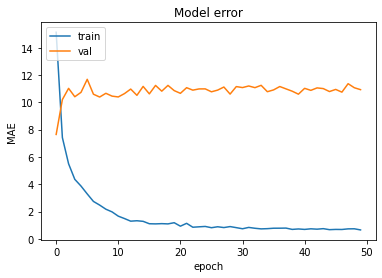

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 384, 1)]          0         
_________________________________________________________________
conv1d (Conv1D)              (None, 384, 64)           512       
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 384, 64)           20544     
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 384, 64)           8256      
_________________________________________________________________
flatten (Flatten)            (None, 24576)             0         
_________________________________________________________________
dense (Dense)                (None, 96)                2359392   
Total params: 2,388,704
Trainable params: 2,388,704
Non-trainable params: 0
___________________________________________________

In [5]:
plt.plot(np.array(history.history['loss']) * (260.0-130.0))
plt.plot(np.array(history.history['val_loss']) * (260.0-130.0))
plt.title('Model error')
plt.ylabel('MAE')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

model.model.summary()

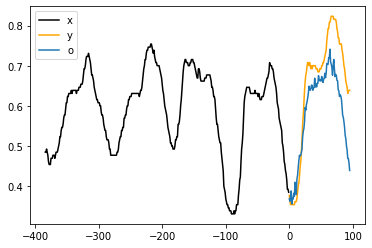

In [10]:
i=0
plt.plot(list(range(-PAST_HISTORY,0)),X_test[i], color='black', label="x")
plt.plot(list(range(FORCASTING_HORIZON)),y_test[i], color='orange', label="y")
plt.plot(list(range(FORCASTING_HORIZON)),y_pred[i], label="o")
plt.legend()
plt.show()